# Sheet 1

Felicitas Freche and Max Reicherd

Git repo: https://github.com/MXM1796/computational_physics_2024_fre_rei.git
ID: 

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 1.1 Just do one big experiment

In [2]:
# Set up experiment parameters
dimension = 2  # 2D space
n_experiments = 1  # Number of experiments
n_points_per_experiment = 10000  # Number of points per experiment

# Generate random points
points = np.random.uniform(low=-1.0, high=1.0, size=(dimension, n_points_per_experiment, n_experiments, ))

In [3]:
# Calculate the squared distance (radius)
radius = (points**2).sum(axis=0)

# Identify points that fall inside the unit circle and inside the square
inside_the_circle = (radius <= 1)
inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) & (-1.0 <= points[1]) & (points[1] <= 1.0))

# Estimate Pi/4 using the ratio of points inside the circle to points inside the square
pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)

# Estimated Pi value
pi = 4 * pi_by_4

In [16]:
# Calculate the average estimate and the uncertainty (standard deviation) of the Pi estimate
average = np.sum(4*inside_the_circle)/(n_points_per_experiment)
uncertainty = np.sqrt(np.sum((4*inside_the_circle-average)**2)/(n_points_per_experiment-1))

# Print the results
print(f'Pi = {average} ± {uncertainty:.4f}')

Pi = 3.1276 ± 1.6519


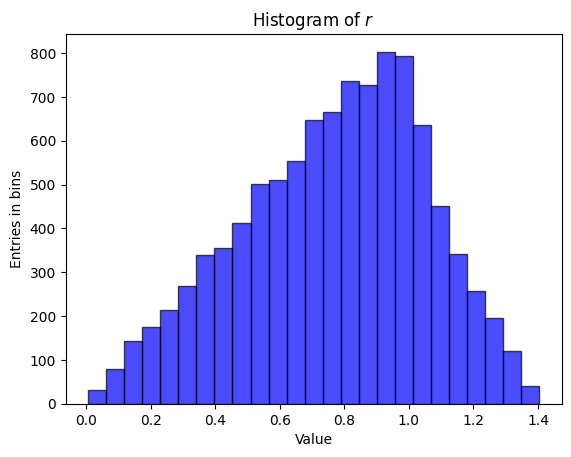

In [5]:
# Plot a histogram of the radius
plt.hist(radius**0.5, bins=25, color='blue', edgecolor='black', alpha=0.7)
plt.ylabel('Entries in bins')
plt.xlabel('Value')
plt.title('Histogram of $r$')
plt.show()

**Explaination:** The Histogram is skewed left. This means there are more binned points on the left of the maximum (approximately 1) than on the right. This results from the fact that we can have more values with radius of 1 because its circumference is the biggest. The bin size of the left side decrease, because on a circumference with a lower radius less points are accumulated. The decrease on the right is due to the cutoff of the circumference with a radius greater than 1. 

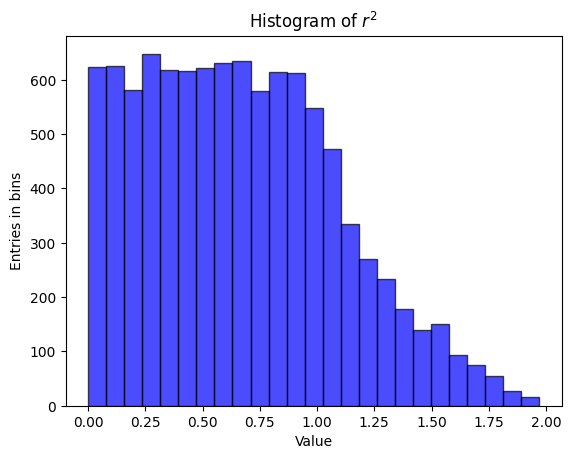

In [6]:
# Plot a histogram of the radius squared
plt.hist(radius, bins=25, color='blue', edgecolor='black', alpha=0.7)
plt.ylabel('Entries in bins')
plt.xlabel('Value')
plt.title('Histogram of $r^2$')
plt.show()

**Explaination:** 
Here the same reasoning applies as above, however here a different scalling factor is applied, since the circumference scales linearly with $2\pi \cdot r$ and the area quadratically with $\pi \cdot r^2$.

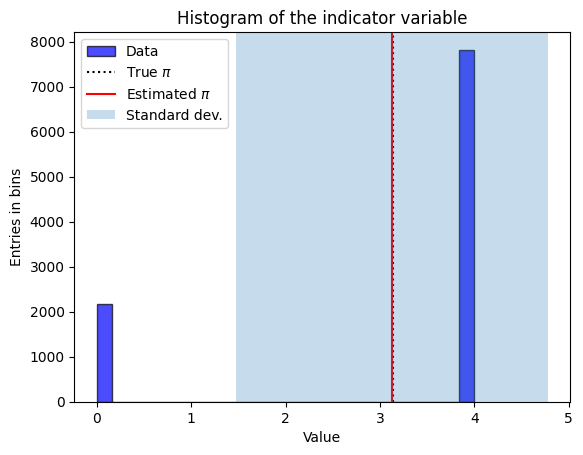

In [7]:
# Plot a histogram of the indicator variable
plt.hist(4*inside_the_circle, bins=25, color='blue', edgecolor='black', alpha=0.7, label = 'Data')
plt.axvline(np.pi, color='black', zorder=1, linestyle=':', label = 'True $\pi$')
plt.axvline(average, color='red', zorder=1, label = 'Estimated $\pi$')
plt.axvspan(average-uncertainty, average+uncertainty, alpha=0.25, label = 'Standard dev.')
plt.ylabel('Entries in bins')
plt.xlabel('Value')
plt.title('Histogram of the indicator variable')
_ = plt.legend()

## 1.2 Split into 100 experiments

In [8]:
# Function to generate random points for given number of experiments and points per experiment
def sample(n_experiments, n_points_per_experiment):
    points = np.random.uniform(low=-1.0, high=1.0, size=(dimension, n_points_per_experiment, n_experiments, ))
    return points

# Function to estimate Pi based on the generated points
def find_pi(points):
    radius = (points**2).sum(axis=0)
    inside_the_circle = (radius <= 1)
    inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) & (-1.0 <= points[1]) & (points[1] <= 1.0))
    pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
    pi = 4 * pi_by_4
    return pi

# Function to calculate the average Pi estimate and its uncertainty
def estimate(pi, n_experiments):
    average = np.sum(pi)/(n_experiments)
    uncertainty = np.sqrt(np.sum((pi-average)**2)/(n_experiments-1))
    return average, uncertainty

In [9]:
# Set the number of experiments and points per experiment for the new simulation
n_experiments_2 = 100
n_points_per_experiment_2 = 100

# Sampling data and estimate Pi
points_2 = sample(n_experiments_2, n_points_per_experiment_2)
pi_2 = find_pi(points_2)
average_2, uncertainty_2 = estimate(pi_2, n_experiments_2)

# Print the results
print(f'Pi = {average_2:.3f} ± {uncertainty_2:.3f}')

Pi = 3.151 ± 0.154


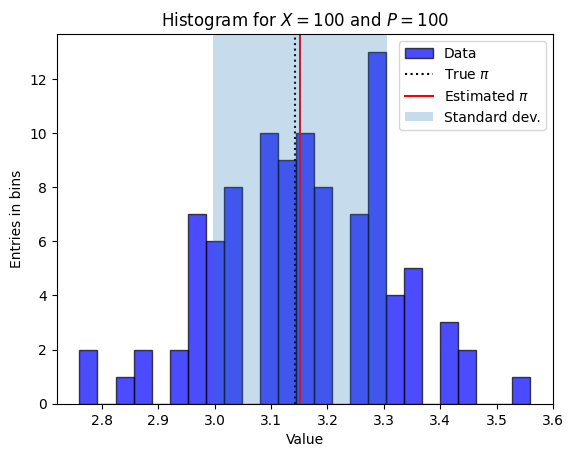

In [10]:
# Plot a histogram of the Pi estimates
plt.hist(pi_2, bins=25, color='blue', edgecolor='black', alpha=0.7, label = 'Data')
plt.axvline(np.pi, color='black', zorder=1, linestyle=':', label = 'True $\pi$')
plt.axvline(average_2, color='red', zorder=1, label = 'Estimated $\pi$')
plt.axvspan(average_2-uncertainty_2, average_2+uncertainty_2, alpha=0.25, label = 'Standard dev.')
plt.ylabel('Entries in bins')
plt.xlabel('Value')
plt.title('Histogram for $X=100$ and $P=100$')
_ = plt.legend()

## 1.3 A Zillion Little Experiments

In [11]:
# Set the number of experiments and points per experiment for the new simulation
n_experiments_3 = 10000
n_points_per_experiment_3 = 1

# Sampling data and estimate Pi
points_3 = sample(n_experiments_3, n_points_per_experiment_3)
pi_3 = find_pi(points_3)
average_3, uncertainty_3 = estimate(pi_3, n_experiments_3)

# Print the results
print(f'={average_3:.3f} ± {uncertainty_3:.3f}')

=3.151 ± 1.636


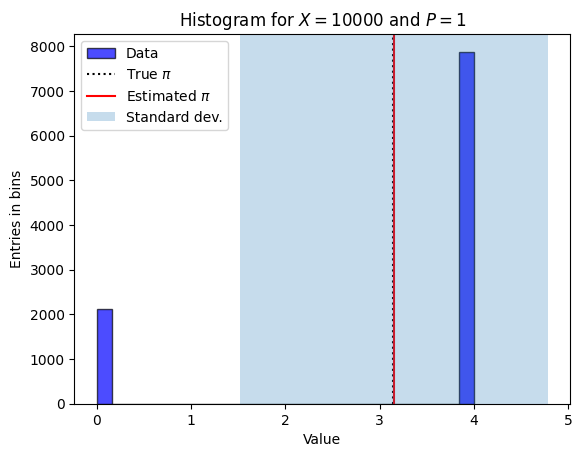

In [12]:
# Plot a histogram of the Pi estimates
plt.hist(pi_3, bins=25, color='blue', edgecolor='black', alpha=0.7, label = 'Data')
plt.axvline(np.pi, color='black', zorder=1, linestyle=':', label = 'True $\pi$')
plt.axvline(average_3, color='red', zorder=1, label = 'Estimated $\pi$')
plt.axvspan(average_3-uncertainty_3, average_3+uncertainty_3, alpha=0.25, label = 'Standard dev.')
plt.ylabel('Entries in bins')
plt.xlabel('Value')
plt.title('Histogram for $X=10000$ and $P=1$')
_ = plt.legend()

**Explaination**: Its visible that we either get 4 (the square area) as result or 0 in a bin relation of $\pi$/4. The result is very similar to the result form exercise 1.1 as one can see that the uncertainties are nearly the same. This means that sampling X=10000 and P=1 or X=1 and P=10000 does not make any difference.

## 1.4 Stop and think

The estimates of the previous parts were compatible with the known value of $\pi$.

A standard derivation of a single experiment with only a measurement of one variable does not make sense, since no average and its derivation can be defined. If the single experiment contains a certain sample size of one measured variable a standard derivation can be derived. It will however stay constant, independent from the size of the sample size, as can be seen in task 1.1. and 1.3. 

Finally, the reorganization of pairs and number of experiments showed clearly that the uncertainty of the expectation value can be lowered if you spent the random numbers in a balanced way.

## 1.5 More Experiments vs. Longer Experiments

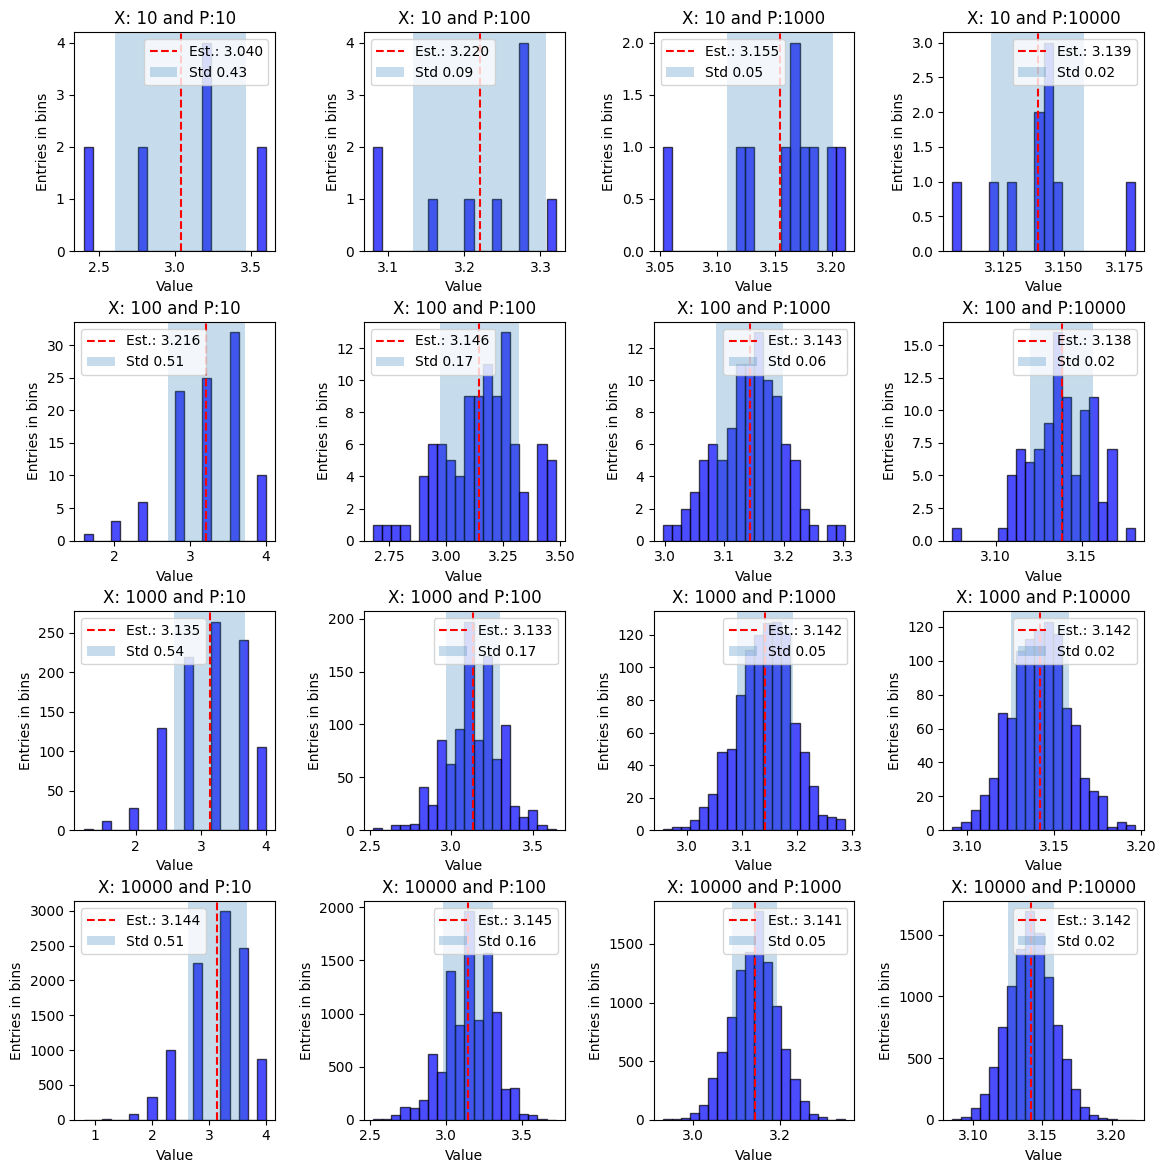

pi_estimates: [3.04       3.22       3.1548     3.13912    3.216      3.1456
 3.1432     3.138224   3.1352     3.13332    3.14174    3.14197
 3.14412    3.144676   3.1412124  3.14156624]
pi_uncertainties: [0.42998708 0.0869227  0.0466114  0.01929034 0.51142897 0.17370775
 0.05655426 0.01804375 0.5410487  0.16657228 0.05061381 0.01690069
 0.51395704 0.16326273 0.05179093 0.01653262]


In [13]:
# Set the number of experiments and points per experiment
P = np.array([10, 100, 1000, 10000])
X = np.array([10, 100, 1000, 10000])

# Intialize arrays for storing results
pi_estimates = np.zeros(16)
pi_uncertainties = np.zeros(16)    
    
# Creating a 4x4 grid for the histograms
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
fig.tight_layout(pad=3.0)

# Initialize counter
counter_1 = 0

# Loop for generating estimates and plotting histograms
for i in range(0, 4):
    counter_2 = 0
    for j in range(0, 4):
        # Sampling data and estimating Pi and uncertainty
        sampled_data = sample(X[i], P[j])
        pi_value, uncertainty_value = estimate(find_pi(sampled_data), X[i])
        pi_estimates[counter_1 + counter_2] = pi_value
        pi_uncertainties[counter_1 + counter_2] = uncertainty_value

        # Generating histogram for the current sampled data
        ax = axs[i, j]
        ax.hist(find_pi(sampled_data), bins=20, color='blue', edgecolor='black', alpha=0.7)
        ax.axvline(pi_value, color='r', linestyle='dashed', linewidth=1.5, label=f'Est.: {pi_value:.3f}')
        ax.axvspan(pi_value - uncertainty_value, pi_value+uncertainty_value, alpha=0.25, label=f'Std {uncertainty_value:.2f}')
        ax.set_title(f'X: {X[i]} and P:{P[j]}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Entries in bins')
        ax.legend()

        # Update counter
        counter_2 += 1
    # Update counter
    counter_1 += 4

# Show the plot
plt.show()

# Print the results
print("pi_estimates:", pi_estimates)
print("pi_uncertainties:", pi_uncertainties)


In [14]:
# Estimate a final Pi value and an uncertainty
final_pi, final_uncertainty = estimate(pi_estimates, 16)
print(f'Pi = {final_pi:.3f} ± {final_uncertainty:.3f}')

Pi = 3.145 ± 0.038


For a fixed number $X\cdot P$ of $100000$ one should choose a balance, so either $X=1000$ and $P=100$ or $X=100$ and $P=1000$. SInce the second case has a lower uncertainty we would choose that.

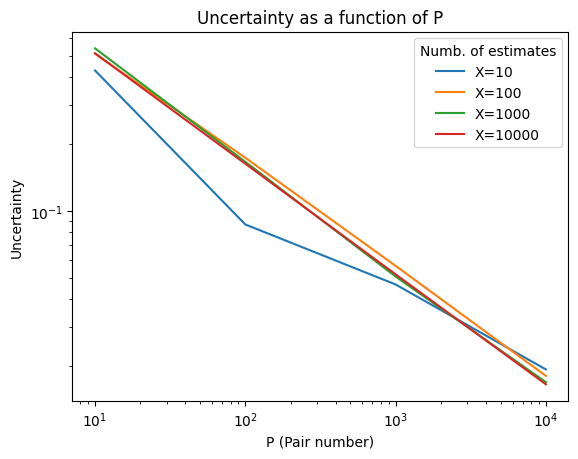

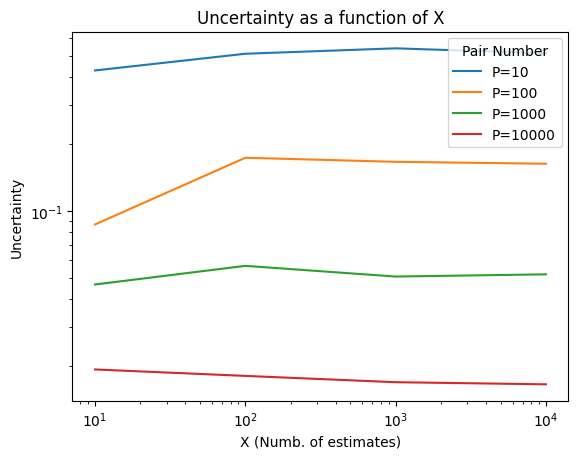

In [15]:
# Plot the uncertainty as a function of P
plt.loglog(P,pi_uncertainties[:4],label=f'X={X[0]}')
plt.loglog(P,pi_uncertainties[4:8],label=f'X={X[1]}')
plt.loglog(P,pi_uncertainties[8:12],label=f'X={X[2]}')
plt.loglog(P,pi_uncertainties[-4:],label=f'X={X[3]}')
plt.title('Uncertainty as a function of P')
plt.ylabel('Uncertainty')
plt.xlabel('P (Pair number)')
plt.legend(title="Numb. of estimates")
plt.show()

# Plot the uncertainty as a function of X
plt.loglog(P,pi_uncertainties[::4],label=f'P={P[0]}')
plt.loglog(P,pi_uncertainties[1::4],label=f'P={P[1]}')
plt.loglog(P,pi_uncertainties[2::4],label=f'P={P[2]}')
plt.loglog(P,pi_uncertainties[3::4],label=f'P={P[3]}')
plt.title('Uncertainty as a function of X')
plt.ylabel('Uncertainty')
plt.xlabel('X (Numb. of estimates)')
_ =plt.legend(loc='upper right', title="Pair Number")

**Observations**

Regarding the "Uncertainty as a function of P" we see the expected falling curve for higher pair numbers. So for higher pair numbers, the uncertainty decreases.
 
Regarding the "Uncertainty as a function of X" we the that independent of the number of estimates, the uncertainty stays approximately constant. For a higher pair number P, the uncertainty just has a lower value but stays constant for increasing X.